# 库函数导入

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

本次我们选择鸢花数据（iris）进行方法的尝试训练，该数据集一共包含5个变量，其中4个特征变量，1个目标分类变量。共有150个样本，目标变量为 花的类别 其都属于鸢尾属下的三个亚属，分别是山鸢尾 (Iris-setosa)，变色鸢尾(Iris-versicolor)和维吉尼亚鸢尾(Iris-virginica)。包含的三种鸢尾花的四个特征，分别是花萼长度(cm)、花萼宽度(cm)、花瓣长度(cm)、花瓣宽度(cm)，这些形态特征在过去被用来识别物种。
变量 	描述
sepal length 	花萼长度(cm)
sepal width 	花萼宽度(cm)
petal length 	花瓣长度(cm)
petal width 	花瓣宽度(cm)
target 	鸢尾的三个亚属类别,'setosa'(0), 'versicolor'(1), 'virginica'(2)

# 数据读入

In [2]:
from sklearn.datasets import load_iris
data=load_iris()
iris_target=data.target#标签
iris_features=pd.DataFrame(data=data.data,columns=data.feature_names)
iris_features
# iris_features.info()
# iris_features.head()
# iris_features.tail()
#iris_features.describe()
#pd.Series(iris_target).value_counts()统计不同标签的个数

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
pd.Series(iris_target).value_counts()

0    50
1    50
2    50
dtype: int64

# 可视化

In [12]:
iris_all=iris_features.copy()
iris_all['target']=iris_target# 合并
iris_all.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


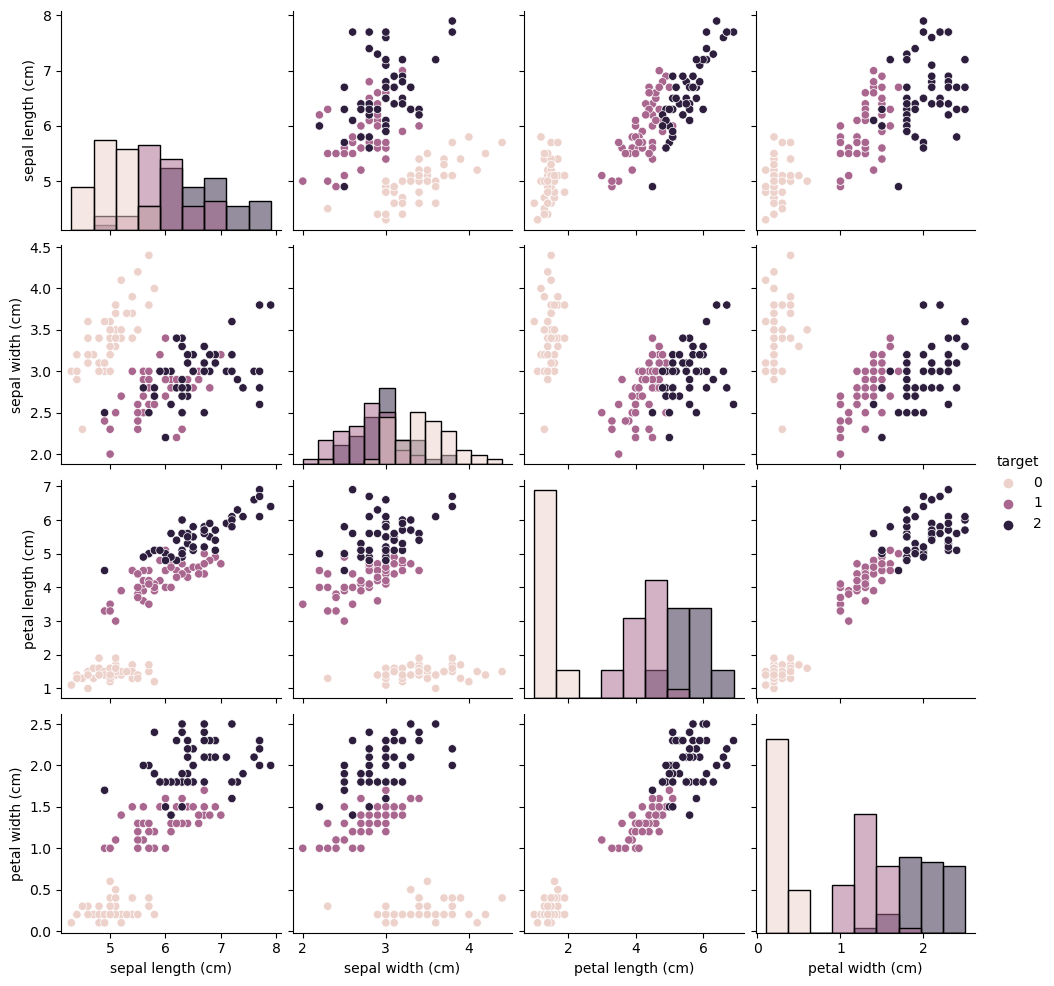

In [4]:
sns.pairplot(data=iris_all,diag_kind='hist',hue='target')# 展示特征之间的相关性
plt.show()

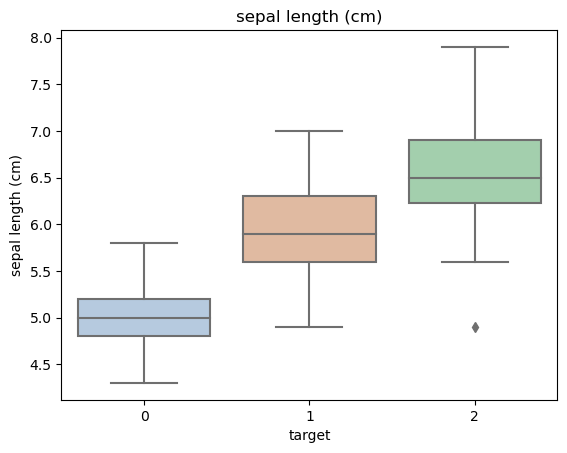

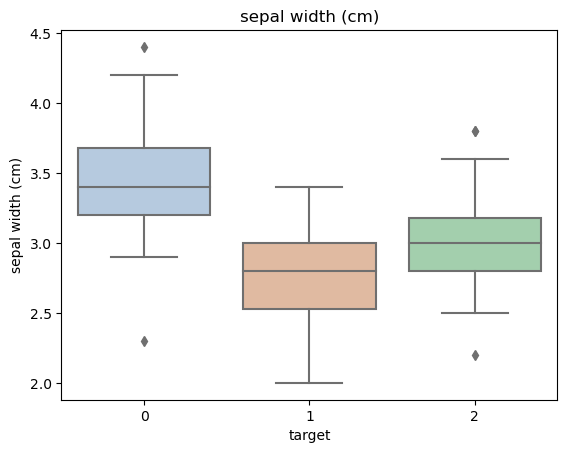

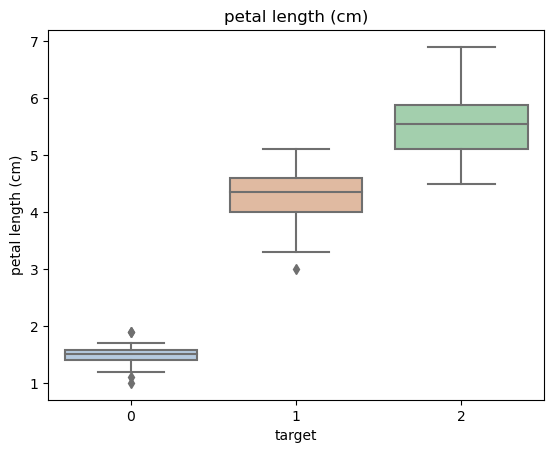

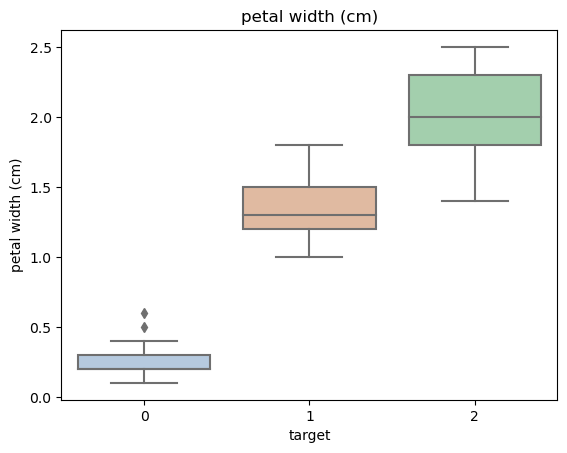

In [5]:
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5,palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

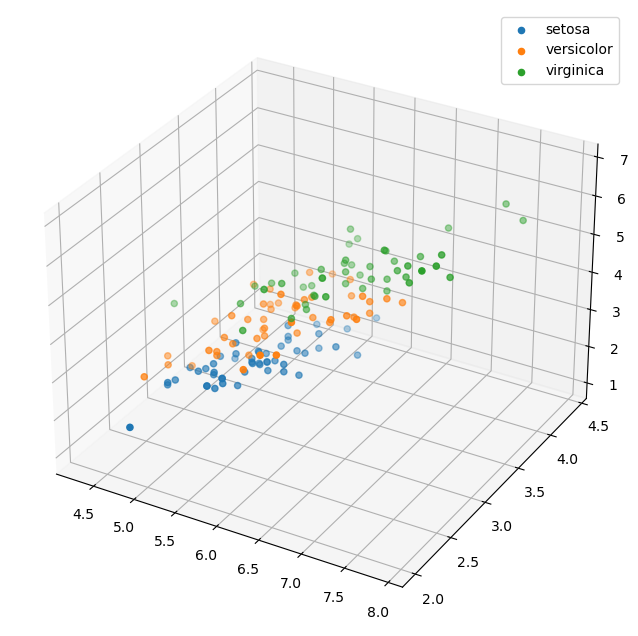

In [6]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2],label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2],label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2],label='virginica')
plt.legend()

plt.show()

# 利用 逻辑回归模型 在二分类上 进行训练和预测

In [19]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split
# 选择标签为0和1的样本全体
iris_features_part=iris_features[:100]
iris_target_part=iris_target[:100]
x_train,x_test,y_train,y_test=train_test_split(iris_features_part,iris_target_part,test_size=0.2,random_state=20)#random_state: 随机数种子，应用于分割前对数据的洗牌。可以是int，RandomState实例或None，默认值=None。设成定值意味着，对于同一个数据集，只有第一次运行是随机的，随后多次分割只要rondom_state相同，则划分结果也相同。
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [20]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)


array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[10  0]
 [ 0 10]]


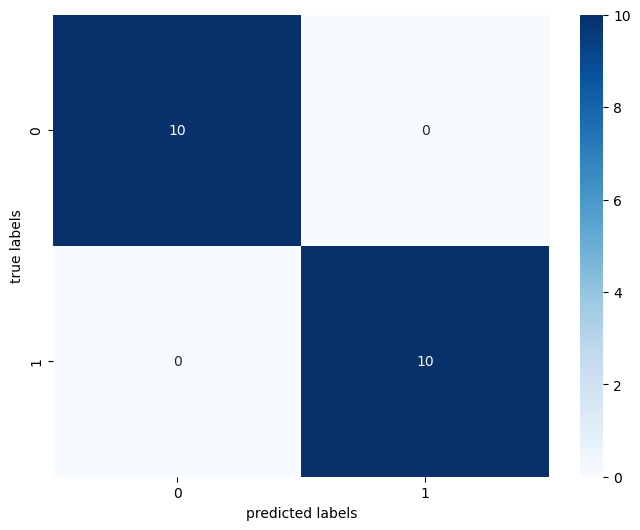

In [24]:
from sklearn import metrics
# accuracy_score:计算正确率的
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))
#混淆矩阵
confusion_matrix_result=metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Blues')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()


# 利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state = 2020)
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(x_train, y_train)

In [25]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所有我们可以利用 predict_proba 函数预测其概率
train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)
## 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[0.00336393 0.99663607]
 [0.0099712  0.9900288 ]
 [0.98289688 0.01710312]
 [0.94566469 0.05433531]
 [0.004571   0.995429  ]
 [0.97705682 0.02294318]
 [0.9761887  0.0238113 ]
 [0.9808763  0.0191237 ]
 [0.9801104  0.0198896 ]
 [0.97763807 0.02236193]
 [0.00233787 0.99766213]
 [0.12157695 0.87842305]
 [0.02380738 0.97619262]
 [0.02145096 0.97854904]
 [0.96248577 0.03751423]
 [0.00140634 0.99859366]
 [0.94229869 0.05770131]
 [0.00433177 0.99566823]
 [0.00512825 0.99487175]
 [0.98239461 0.01760539]]
The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
